Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and processing

In [ ]:
#load the data from csv file to Pandas Dataframe
titanic=pd.read_csv('/content/train.csv')

In [ ]:
#printing the first 5 rows of dataframe
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#number of rows and columns
titanic.shape

(891, 12)

In [ ]:
#getting some info about the data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#check the no. of missing values in each column
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling the missing values

In [ ]:
#drop the "Cabin" column from dataframe
titanic=titanic.drop(columns='Cabin',axis=1)

In [ ]:
#replacing the missing values in "Age" column with mean value
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

In [ ]:
#Embarked column has only 2 missing values ,so to replace them we take mode(the one that is repeated the most no. of time) and replace it with the mssing values
#finding the mode value of the 'Embarked' column
print(titanic['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
#replacing the missing values of 'Embarked' column with mode
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)

In [ ]:
#check the no. of missing values in each column
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [ ]:
#getting some statistical measures about the data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#finding the no. of people have survived and not survived
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Data Visualization

In [ ]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

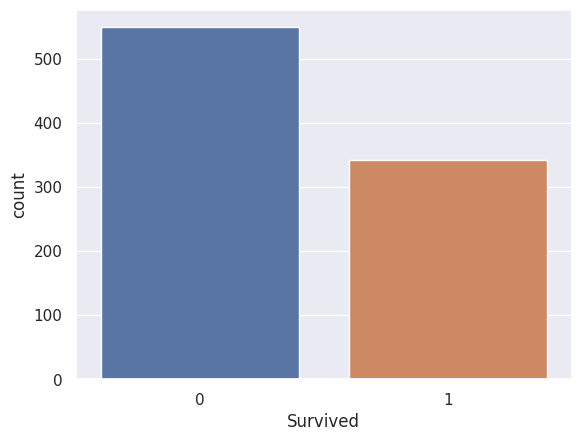

In [ ]:
#making a count plot for 'survived' column
sns.countplot(data=titanic,x='Survived')

<Axes: xlabel='Sex', ylabel='count'>

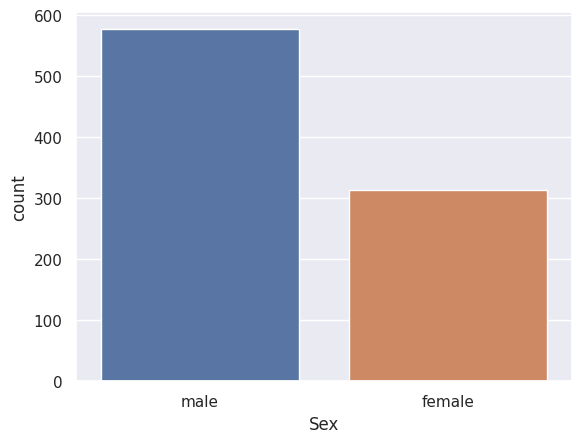

In [ ]:
#making a count plot for 'sex' column
sns.countplot(data=titanic,x='Sex')

<Axes: xlabel='Sex', ylabel='count'>

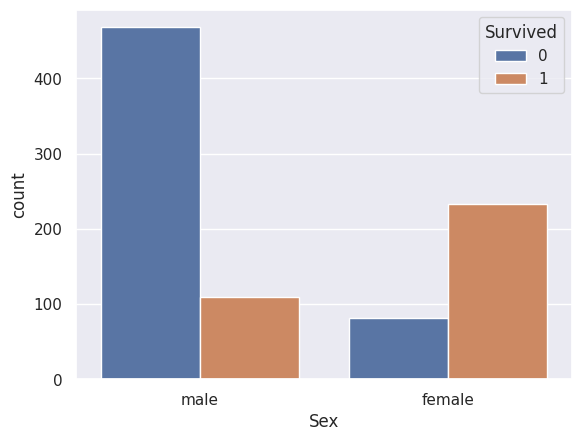

In [ ]:
#number of survivors Gender wise
sns.countplot(data=titanic,x='Sex',hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

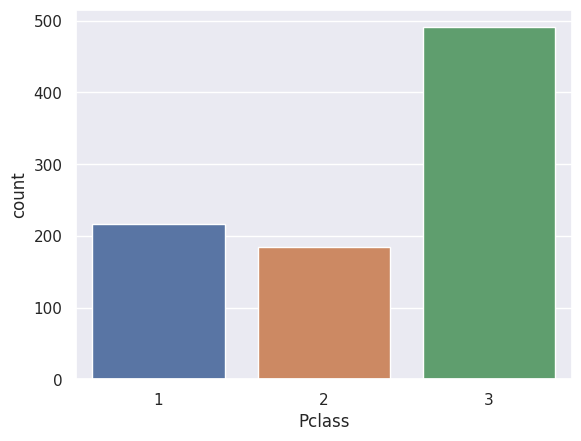

In [ ]:
#making a count plot for 'Pclass' column
sns.countplot(data=titanic,x='Pclass')

<Axes: xlabel='Pclass', ylabel='count'>

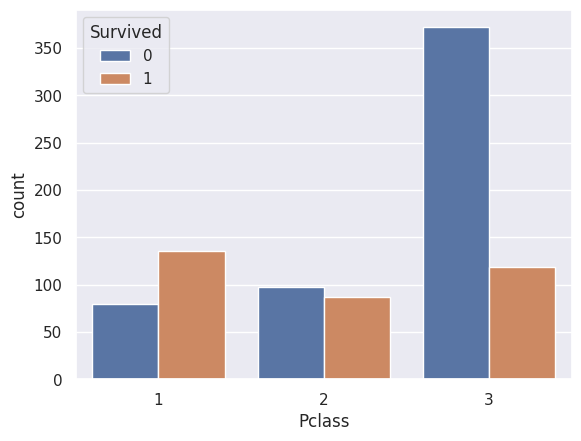

In [ ]:
#number of survivors Pclass based
sns.countplot(x='Pclass',hue='Survived',data=titanic)

<Axes: >

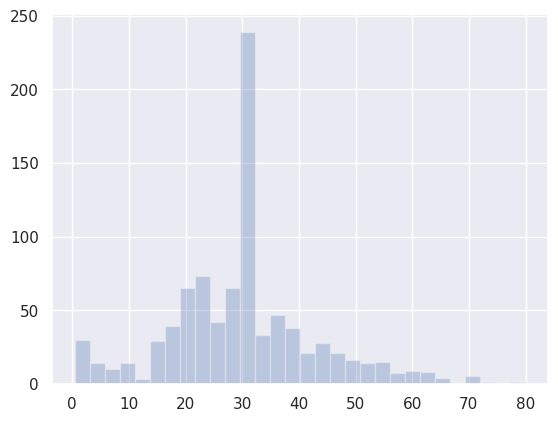

In [ ]:
titanic['Age'].hist(bins=30,alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

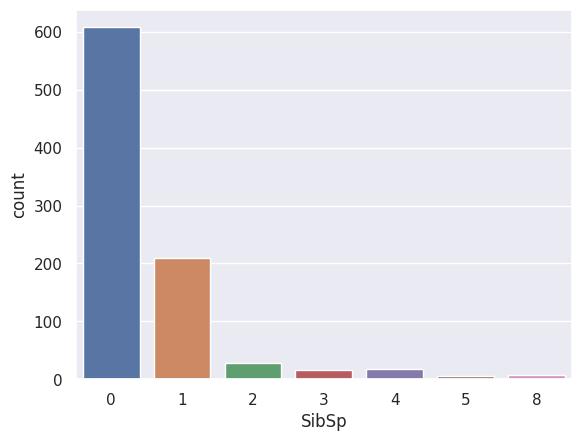

In [ ]:
sns.countplot(x='SibSp',data=titanic)

Encoding the Categorical Columns(Contains categorioes ,here: sex, embarked)

In [ ]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
#converting the categorical columns
titanic.replace({'Sex':{'male':0,'female':1} ,'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Separating features and target

In [ ]:
X=titanic.drop(columns =['PassengerId','Name','Ticket','Survived'],axis=1)
Y=titanic['Survived']

In [ ]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Splitting the data into training data & Test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (623, 7) (268, 7)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=500)
lr.fit(X_train,Y_train)

LogisticRegression(max_iter=500)

In [ ]:
Y_pred=lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(Y_test,Y_pred)

array([[135,  19],
       [ 40,  74]])

In [ ]:
accuracy_score(Y_test,Y_pred)

0.7798507462686567